# Analyze the OOI and GAGE social group info

In [35]:
import pandas as pd
import collections
import statistics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

DIR =  "/Users/qybo123/PycharmProjects/Recom_sys/OOI/ooi_2019/"
FILE_IP = "ooi_ip_to_loc_all_2019.csv"
FILE_LOG = "ooi_all_full_kg_2019.csv"
DIR_FIG = "/Users/qybo123/PycharmProjects/KG_data_model_paper/figures/"

In [4]:
df_ooi_user = pd.read_csv(DIR + FILE_IP)

In [5]:
df_ooi_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userIP       4017 non-null   object 
 1   city         2484 non-null   object 
 2   subdivision  2986 non-null   object 
 3   country      4010 non-null   object 
 4   continent    4017 non-null   object 
 5   zip          2438 non-null   object 
 6   lat          4016 non-null   float64
 7   long         4016 non-null   float64
dtypes: float64(2), object(6)
memory usage: 251.2+ KB


In [6]:
df_ooi_user.head()

userIP     city subdivision        country      continent    zip  \
0     46.4.69.189      NaN         NaN        Germany         Europe    NaN   
1  46.229.168.147  Ashburn    Virginia  United States  North America  20147   
2  46.229.168.133  Ashburn    Virginia  United States  North America  20147   
3  46.229.168.146  Ashburn    Virginia  United States  North America  20147   
4  46.229.168.138  Ashburn    Virginia  United States  North America  20147   

       lat    long  
0  51.2993   9.491  
1  39.0180 -77.539  
2  39.0180 -77.539  
3  39.0180 -77.539  
4  39.0180 -77.539

## OOI user groups by city

In [81]:
city_userIPs_dict =  df_ooi_user.groupby(["city"])["userIP"].unique().apply(list).to_dict()

### Count user numbers in each group

In [82]:
city_user_num_dict = collections.defaultdict()
city_user_IP_dict = collections.defaultdict(list)
city_user_num_list = []

for city, userIP_list in city_userIPs_dict.items():
    city_user_num_dict[city] = len(userIP_list)
    city_user_IP_dict[city] = userIP_list
    city_user_num_list.append(len(userIP_list))
    
print(f"By city, tot_city={len(city_userIPs_dict)}; average users per city={statistics.mean(city_user_num_list)}; median users per city={statistics.median(city_user_num_list)}")

By city, tot_city=440; average users per city=5.6454545454545455; median users per city=1.0


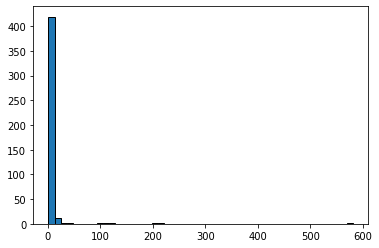

In [16]:
ax = plt.subplot()

plt.hist(city_user_num_list, bins=50, edgecolor="black")
plt.show()

Tot_user=440; G1=283 (64.31818181818181%);G2=132 (30.0%);G3=22 (5.0%);G4=3 (0.6818181818181818%)


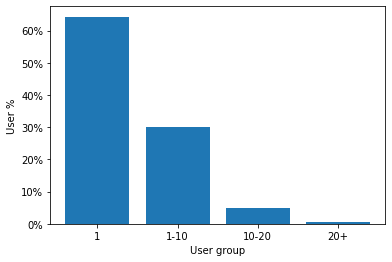

In [95]:
g1 = [] # Group #1, 
g2 = [] # Group #2, 
g3 = [] # Group #3,
g4 = []

for city, val in city_user_num_dict.items():
    
    if 0 < val <= 1:
        g1.append(city)
    elif 1 < val <= 10:
        g2.append(city)
    elif 10 < val <= 200:
        g3.append(city)
    else:
        g4.append(city)
        
tot_city = len(city_user_num_dict)

print(f"Tot_user={tot_city}; G1={len(g1)} ({len(g1)/tot_city*100}%);\
G2={len(g2)} ({len(g2)/tot_city*100}%);\
G3={len(g3)} ({len(g3)/tot_city*100}%);\
G4={len(g4)} ({len(g4)/tot_city*100}%)")


# Plot
ax = plt.subplot()
label = ['1', '1-10', '10-20', '20+']
x = [1, 2, 3, 4]
y = [len(g1)/tot_city*100, len(g2)/tot_city*100, len(g3)/tot_city*100, len(g4)/tot_city*100]

plt.bar(x, y)
plt.xticks(x, label)
plt.ylabel('User %')
plt.xlabel("User group")
# plt.title("User group distribution")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.savefig(DIR_FIG + "ooi_user_group_1_10_20_100.pdf")
plt.show()

### Find the query volumn from each user groups

In [84]:
g1 = [] # Group #1, 
g2 = [] # Group #2, 
g3 = [] # Group #3,
g4 = []

for city, val in city_user_num_dict.items():
    
    if 0 < val <= 1:
        g1.append(city)
    elif 1 < val <= 10:
        g2.append(city)
    elif 10 < val <= 20:
        g3.append(city)
    else:
        g4.append(city)
        
user_g_1 = [] # userIP list in group #1
user_g_2 = []
user_g_3 = []
user_g_4 = []

for city in g1:
    user_g_1 += city_user_IP_dict[city]

for city in g2:
    user_g_2 += city_user_IP_dict[city]
    
for city in g3:
    user_g_3 += city_user_IP_dict[city]
    
for city in g4:
    user_g_4 += city_user_IP_dict[city]



In [38]:
print(f"user_g_1={len(user_g_1)}, user_g_2={len(user_g_2)}, user_g_3={len(user_g_3)}, user_g_4={len(user_g_4)}")

user_g_1=283, user_g_2=473, user_g_3=134, user_g_4=1594


### Load the user query info table

In [85]:
df_ooi_user_query = pd.read_csv("/Users/qybo123/PycharmProjects/KG_data_model_paper/ooi_user_all_query_info.csv")

In [26]:
df_ooi_user_query.head()

userIP  num_query  num_refdes  \
0  100.24.206.185    2656391         969   
1   100.24.209.47         30          15   
2   100.25.111.32    2813305         969   
3  100.26.175.246    2761226         969   
4  100.26.252.111    2626865         969   

                                         refdes_list  
0  ['GP02HYPM-RIM01-02-CTDMOG039', 'GS01SUMO-RID1...  
1  ['CE04OSPS-SF01B-3D-SPKIRA102', 'CE04OSPS-SF01...  
2  ['RS01SBPD-DP01A-01-CTDPFL104', 'RS01SBPD-DP01...  
3  ['GP02HYPM-RIM01-02-CTDMOG039', 'GI01SUMO-RID1...  
4  ['GP02HYPM-RIM01-02-CTDMOG039', 'GS01SUMO-RID1...

In [86]:
# Build dicts
userIP_num_query_dict = collections.defaultdict()
userIP_num_refdes_dict = collections.defaultdict()

for idx, row in df_ooi_user_query.iterrows():
    userIP = row["userIP"]
    num_q = row["num_query"]
    num_r = row["num_refdes"]
    
    userIP_num_query_dict[userIP] = num_q
    userIP_num_refdes_dict[userIP] = num_r

### Plot the query volume of each user group

In [87]:
query_g_1 = []
query_g_2 = []
query_g_3 = []
query_g_4 = []

for userIP in user_g_1:
    try:
        query_g_1.append(userIP_num_query_dict[userIP])
    except:
        continue
        
for userIP in user_g_2:
    try:
        query_g_2.append(userIP_num_query_dict[userIP])
    except:
        continue

for userIP in user_g_3:
    try:
        query_g_3.append(userIP_num_query_dict[userIP])
    except:
        continue
        
for userIP in user_g_4:
    try:
        query_g_4.append(userIP_num_query_dict[userIP])
    except:
        continue

tot_query=138749706
G1=0.002521086423058799, G2=0.16155565763865473, G3=0.0017527965068264723, G4=99.66556830037536


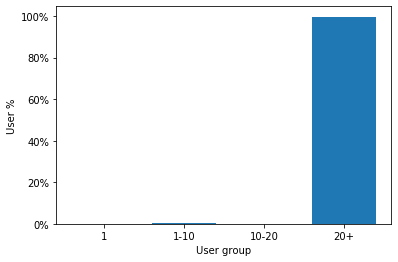

In [96]:
tot_query = sum(userIP_num_query_dict.values())
print(f"tot_query={tot_query}")

# print(f"Tot_user={tot_city}; G1={len(g1)} ({len(g1)/tot_city*100}%);\
# G2={len(g2)} ({len(g2)/tot_city*100}%);\
# G3={len(g3)} ({len(g3)/tot_city*100}%)")


# Plot
ax = plt.subplot()
label = ['1', '1-10', '10-20', '20+']
x = [1, 2, 3, 4]
y = [sum(query_g_1)/tot_query*100, sum(query_g_2)/tot_query*100, sum(query_g_3)/tot_query*100, sum(query_g_4)/tot_query*100]

print(f"G1={sum(query_g_1)/tot_query*100}, G2={sum(query_g_2)/tot_query*100}, G3={sum(query_g_3)/tot_query*100}, G4={sum(query_g_4)/tot_query*100}")

plt.bar(x, y)
plt.xticks(x, label)
plt.ylabel('User %')
plt.xlabel("User group")
# plt.title("User group distribution")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.savefig(DIR_FIG + "ooi_user_group_query_volumn_1_10_20_100.pdf")
plt.show()

# GAGE logs

In [97]:
df_gage_user = pd.read_csv('/Users/qybo123/PycharmProjects/Recom_sys/unavco/un_user_ip_loc.csv')

In [44]:
df_gage_user.head()

userID           userIP         city         country      continent  \
0       0     92.233.75.45      Bristol  United Kingdom         Europe   
1       1     130.79.10.18   Strasbourg          France         Europe   
2       2  193.232.110.116          NaN          Russia         Europe   
3       3     137.78.60.62          NaN   United States  North America   
4       4      68.189.0.76  Morgan Hill   United States  North America   

  user_group  
0          0  
1          1  
2       None  
3       None  
4          2

### Group by city

In [98]:
city_userIPs_dict =  df_gage_user.groupby(["city"])["userIP"].unique().apply(list).to_dict()

In [99]:
city_user_num_dict = collections.defaultdict()
city_user_IP_dict = collections.defaultdict(list)
city_user_num_list = []

for city, userIP_list in city_userIPs_dict.items():
    city_user_num_dict[city] = len(userIP_list)
    city_user_IP_dict[city] = userIP_list
    city_user_num_list.append(len(userIP_list))
    
print(f"By city, tot_city={len(city_userIPs_dict)}; average users per city={statistics.mean(city_user_num_list)}; median users per city={statistics.median(city_user_num_list)}")

By city, tot_city=3086; average users per city=5.341866493843162; median users per city=1.0


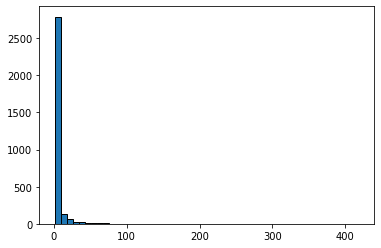

In [55]:
ax = plt.subplot()

plt.hist(city_user_num_list, bins=50, edgecolor="black")
plt.show()

Tot_user=3086; G1=1709 (55.379131561892414%);G2=1105 (35.806869734283865%);G3=268 (8.684381075826312%);G4=4 (0.12961762799740764%)


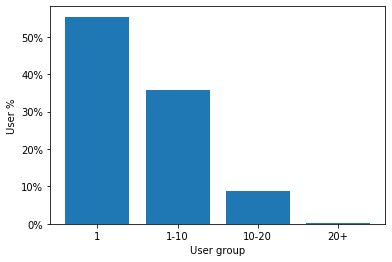

In [100]:
g1 = [] # Group #1, 
g2 = [] # Group #2, 
g3 = [] # Group #3,
g4 = []

for city, val in city_user_num_dict.items():
    
    if 0 < val <= 1:
        g1.append(city)
    elif 1 < val <= 10:
        g2.append(city)
    elif 10 < val <= 200:
        g3.append(city)
    else:
        g4.append(city)
        
tot_city = len(city_user_num_dict)

print(f"Tot_user={tot_city}; G1={len(g1)} ({len(g1)/tot_city*100}%);\
G2={len(g2)} ({len(g2)/tot_city*100}%);\
G3={len(g3)} ({len(g3)/tot_city*100}%);\
G4={len(g4)} ({len(g4)/tot_city*100}%)")


# Plot
ax = plt.subplot()
label = ['1', '1-10', '10-20', '20+']
x = [1, 2, 3, 4]
y = [len(g1)/tot_city*100, len(g2)/tot_city*100, len(g3)/tot_city*100, len(g4)/tot_city*100]

plt.bar(x, y)
plt.xticks(x, label)
plt.ylabel('User %')
plt.xlabel("User group")
# plt.title("User group distribution")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.savefig(DIR_FIG + "gage_user_group_1_10_20_100.pdf")
plt.show()

In [101]:
g1 = [] # Group #1, 
g2 = [] # Group #2, 
g3 = [] # Group #3,
g4 = []

for city, val in city_user_num_dict.items():
    
    if 0 < val <= 1:
        g1.append(city)
    elif 1 < val <= 10:
        g2.append(city)
    elif 10 < val <= 20:
        g3.append(city)
    else:
        g4.append(city)
        
user_g_1 = [] # userIP list in group #1
user_g_2 = []
user_g_3 = []
user_g_4 = []

for city in g1:
    user_g_1 += city_user_IP_dict[city]

for city in g2:
    user_g_2 += city_user_IP_dict[city]
    
for city in g3:
    user_g_3 += city_user_IP_dict[city]
    
for city in g4:
    user_g_4 += city_user_IP_dict[city]



In [62]:
user_g_4

['209.136.235.139',
 '96.92.74.73',
 '129.24.96.56',
 '173.163.241.117',
 '73.228.20.4',
 '96.64.151.81',
 '97.123.3.199',
 '170.144.226.120',
 '170.144.234.174',
 '129.24.36.198',
 '170.144.230.13',
 '170.144.234.56',
 '170.144.236.207',
 '170.144.224.252',
 '170.144.231.136',
 '170.144.233.152',
 '170.144.231.186',
 '96.64.150.65',
 '170.144.227.186',
 '50.233.170.58',
 '164.159.60.2',
 '97.123.173.94',
 '67.0.233.96',
 '50.243.20.29',
 '170.144.228.15',
 '170.144.233.34',
 '170.144.226.158',
 '209.136.235.76',
 '170.144.226.6',
 '170.144.236.128',
 '170.144.226.26',
 '170.144.229.144',
 '209.136.235.140',
 '173.12.204.134',
 '170.144.234.131',
 '170.144.235.39',
 '97.123.82.72',
 '174.237.7.160',
 '170.144.236.131',
 '170.144.235.97',
 '74.92.205.225',
 '67.41.96.89',
 '75.161.86.250',
 '64.106.111.98',
 '75.161.83.186',
 '132.62.88.130',
 '209.194.170.201',
 '188.166.121.88',
 '128.199.53.63',
 '107.181.78.15',
 '146.185.134.85',
 '146.185.130.183',
 '185.232.20.215',
 '185.5.121.2

### Load the user query info table

In [102]:
df_gage_user_query = pd.read_csv("/Users/qybo123/PycharmProjects/KG_data_model_paper/gage_user_all_query_info.csv")

In [64]:
df_gage_user_query.head()

userIP  num_query  num_scode  \
0  001.002.204.223          1          1   
1  001.010.206.005         11          6   
2  001.010.206.009        100         20   
3  001.010.206.172         57         12   
4  001.010.206.200         32         19   

                                          scode_list  
0                                           ['GAGE']  
1   ['HYDE', 'IISC', 'JMLA', 'JMSM', 'CHLM', 'CHNR']  
2  ['KIT3', 'TASH', 'KAZA', 'TALA', 'POL2', 'CHUM...  
3  ['JMSM', 'CHLM', 'HYDE', 'LHAZ', 'KMTR', 'IISC...  
4  ['JMSM', 'KIT3', 'CHLM', 'TASH', 'KMTR', 'TALA...

#### To align the IP, e.,g '001.010.206.005' --> '1.10.206.5'

In [103]:
IP_map_dict = collections.defaultdict()

IP_list = list(df_gage_user_query.userIP.unique())

for IP in IP_list:
    tmp1 = IP.split(".")
    IP_2 = ".".join([str(int(x)) for x in tmp1])
    IP_map_dict[IP] = IP_2

df_gage_user_query["userIP2"] = df_gage_user_query["userIP"].map(IP_map_dict)


In [104]:
df_gage_user_query.head()

userIP  num_query  num_scode  \
0  001.002.204.223          1          1   
1  001.010.206.005         11          6   
2  001.010.206.009        100         20   
3  001.010.206.172         57         12   
4  001.010.206.200         32         19   

                                          scode_list       userIP2  
0                                           ['GAGE']   1.2.204.223  
1   ['HYDE', 'IISC', 'JMLA', 'JMSM', 'CHLM', 'CHNR']    1.10.206.5  
2  ['KIT3', 'TASH', 'KAZA', 'TALA', 'POL2', 'CHUM...    1.10.206.9  
3  ['JMSM', 'CHLM', 'HYDE', 'LHAZ', 'KMTR', 'IISC...  1.10.206.172  
4  ['JMSM', 'KIT3', 'CHLM', 'TASH', 'KMTR', 'TALA...  1.10.206.200

In [105]:
# Build dicts
userIP_num_query_dict = collections.defaultdict()
userIP_num_scode_dict = collections.defaultdict()

for idx, row in df_gage_user_query.iterrows():
    userIP = row["userIP2"]
    num_q = row["num_query"]
    num_s = row["num_scode"]
    
    userIP_num_query_dict[userIP] = num_q
    userIP_num_scode_dict[userIP] = num_s

### Plot the query volume of each user group

In [106]:
query_g_1 = []
query_g_2 = []
query_g_3 = []
query_g_4 = []

for userIP in user_g_1:
    try:
        query_g_1.append(userIP_num_query_dict[userIP])
    except:
        continue
        
for userIP in user_g_2:
    try:
        query_g_2.append(userIP_num_query_dict[userIP])
    except:
        continue

for userIP in user_g_3:
    try:
        query_g_3.append(userIP_num_query_dict[userIP])
    except:
        continue
        
for userIP in user_g_4:
    try:
        query_g_4.append(userIP_num_query_dict[userIP])
    except:
        continue

tot_query=67660330
G1=4.848202779974618, G2=13.596299338179401, G3=12.332898760617928, G4=37.03125598116356


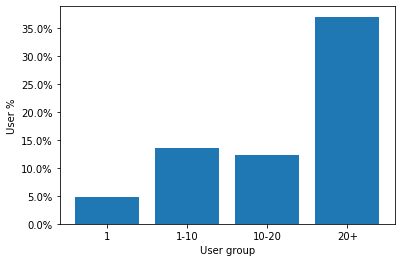

In [107]:
tot_query = sum(userIP_num_query_dict.values())
print(f"tot_query={tot_query}")

# print(f"Tot_user={tot_city}; G1={len(g1)} ({len(g1)/tot_city*100}%);\
# G2={len(g2)} ({len(g2)/tot_city*100}%);\
# G3={len(g3)} ({len(g3)/tot_city*100}%)")


# Plot
ax = plt.subplot()
label = ['1', '1-10', '10-20', '20+']
x = [1, 2, 3, 4]
y = [sum(query_g_1)/tot_query*100, sum(query_g_2)/tot_query*100, sum(query_g_3)/tot_query*100, sum(query_g_4)/tot_query*100]

print(f"G1={sum(query_g_1)/tot_query*100}, G2={sum(query_g_2)/tot_query*100}, G3={sum(query_g_3)/tot_query*100}, G4={sum(query_g_4)/tot_query*100}")

plt.bar(x, y)
plt.xticks(x, label)
plt.ylabel('User %')
plt.xlabel("User group")
# plt.title("User group distribution")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.savefig(DIR_FIG + "gage_user_group_query_volumn_1_10_20_100.pdf")
plt.show()